In [19]:
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.dates as mdates

plt.rcParams["figure.figsize"] = [12.0, 6.0]

import okama as ok

pd.options.display.float_format = "{:,.5f}".format
np.set_printoptions(precision=5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
ok.__version__

'1.4.2'

In [21]:
ef = ok.EfficientFrontierReb(
    assets=[
        'RGBITR.INDX',
        'RUCBTRNS.INDX',
        'MCFTR.INDX',
        'GC.COMM'
    ],
    inflation=True,
    ccy="RUB",
    rebalancing_period="year",
    n_points=20
)

In [22]:
ef.n_points

20

In [24]:
result = ef.max_withdrawals_points(
    withdrawal_steps=20,
    confidence_level=0.5,
    # cash flow
    initial_investment=10_300_000,
    indexation=0,
    min_amount=-100_000,
    max_amount=-1,
    # monte carlo
    distribution="t",
    period=10,
    number=100
)

In [25]:
result

RGBITR.INDX  RUCBTRNS.INDX  MCFTR.INDX  GC.COMM  Mean return    Risk  \
0       0.25000        0.25000     0.25000  0.25000      0.00664 0.10843   
1       0.25000        0.25000     0.25000  0.25000      0.00706 0.10843   
2       0.25000        0.25000     0.25000  0.25000      0.00749 0.10843   
3       0.25000        0.25000     0.25000  0.25000      0.00791 0.10843   
4           NaN            NaN         NaN      NaN      0.00834     NaN   
5       0.25000        0.25000     0.25000  0.25000      0.00876 0.10843   
6           NaN            NaN         NaN      NaN      0.00918     NaN   
7       0.25000        0.25000     0.25000  0.25000      0.00961 0.10843   
8       0.25000        0.25000     0.25000  0.25000      0.01003 0.10843   
9       0.25000        0.25000     0.25000  0.25000      0.01046 0.10843   
10      0.25000        0.25000     0.25000  0.25000      0.01088 0.10843   
11      0.25000        0.25000     0.25000  0.25000      0.01130 0.10843   
12          NaN            NaN         NaN      NaN      0.01173     NaN   
13          NaN            NaN         NaN      NaN      0.01215     NaN   
14      0.25000        0.25000     0.25000  0.25000      0.01257 0.10843   
15      0.25000        0.25000     0.25000  0.25000      0.01300 0.10843   
16          NaN            NaN         NaN      NaN      0.01342     NaN   
17      0.25000        0.25000     0.25000  0.25000      0.01385 0.10843   
18      0.25000        0.25000     0.25000  0.25000      0.01427 0.10843   
19          NaN            NaN         NaN      NaN      0.01469     NaN   

    Max withdrawals  
0     -63,158.26316  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7               NaN  
8               NaN  
9               NaN  
10    -63,158.26316  
11              NaN  
12              NaN  
13              NaN  
14              NaN  
15              NaN  
16              NaN  
17              NaN  
18    -57,895.15789  
19              NaN

## DCF

In [3]:
weights = [0.10, 0.51,  0.19, .20]

portf = ok.Portfolio(
    [
        "RGBITR.INDX",
        "RUCBTRNS.INDX",
        "MCFTR.INDX",
        "GC.COMM"
    ],
    ccy="RUB",
    weights=weights,
    inflation=True,
    symbol="retirement_portf.PF",
    rebalancing_period="year",
)
portf

symbol                                              retirement_portf.PF
assets                [RGBITR.INDX, RUCBTRNS.INDX, MCFTR.INDX, GC.COMM]
weights                                          [0.1, 0.51, 0.19, 0.2]
rebalancing_period                                                 year
currency                                                            RUB
inflation                                                      RUB.INFL
first_date                                                      2003-01
last_date                                                       2024-07
period_length                                        21 years, 7 months
dtype: object

In [49]:
# Set cashflow
portf_copy.dcf.set_cashflow_parameters(
    initial_investment=10_300_000,
    method="fixed_amount",
    frequency="month",
    amount=-50_000,
    indexation=0
)

In [50]:
# Set Monte Carlo
portf_copy.dcf.set_mc_parameters(distribution="t", period=20, number=100)

In [51]:
portf_copy.dcf.initial_investment_fv

27328966.362987548

In [52]:
min_amount = -50_000
max_amount = -1
steps = 10
confidence_level = 0.5

largest_withdrawal = portf_copy.dcf.find_the_largest_withdrawals_size(
                min_amount=min_amount,
                max_amount=max_amount,
                steps=steps,
                confidence_level=confidence_level
            )
largest_withdrawal

testing: -50000.0
wealth_at_quantile=np.float64(22254810.6337315)
testing: -44444.555555555555
wealth_at_quantile=np.float64(24968429.118762903)
testing: -38889.11111111111
wealth_at_quantile=np.float64(27534445.54672993)


np.float64(-38889.11111111111)

In [50]:
portf_copy.dcf.set_mc_parameters(distribution="lognorm", period=20, number=100)

In [15]:
df = portf.dcf.monte_carlo_wealth

In [18]:
portf.dcf._monte_carlo_wealth

Empty DataFrame
Columns: []
Index: []

In [14]:
portf.dcf.monte_carlo_survival_period.describe()

count   10.00000
mean    20.00000
std      0.00000
min     20.00000
25%     20.00000
50%     20.00000
75%     20.00000
max     20.00000
dtype: float64

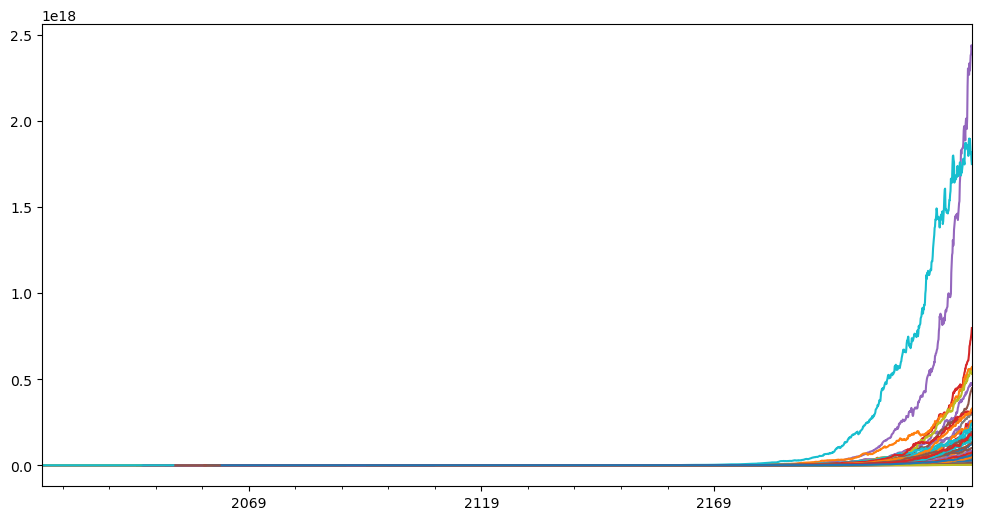

In [26]:
portf.dcf.plot_forecast_monte_carlo(backtest=False)

## Find withdrawl amount

In [41]:
portf.dcf.set_mc_parameters(distribution="t", period=40, number=1000)

In [42]:
min_amount = -100_000
max_amount = -5_000
steps = 10
amount_range = np.linspace(min_amount, max_amount, steps)
amount_range

array([-100000.     ,  -89444.44444,  -78888.88889,  -68333.33333,
        -57777.77778,  -47222.22222,  -36666.66667,  -26111.11111,
        -15555.55556,   -5000.     ])

In [43]:
portf.dcf.initial_investment_fv

np.float64(261339454.316157)

In [44]:
for a in amount_range:
    # Set cashflow
    print(f"testing {a:.1f}")
    portf.dcf.set_cashflow_parameters(
        initial_investment=10_300_000,
        method="fixed_amount",
        frequency="quarter",
        amount=a,
        indexation=portf.dcf.discount_rate
    )
    sp25 = portf.dcf.monte_carlo_survival_period.quantile(25/100)
    wealth25 = portf.dcf.monte_carlo_wealth.iloc[-1, :].quantile(25/100)
    if sp25 == portf.dcf.mc.period:
        print(f"Survival period is good")
        if wealth25 >= portf.dcf.initial_investment_fv:
            print(f"max withdrawl found: {a:.1f}")
            break
        else:
            print(f"portfolios balance is low.")

testing -100000.0
Survival period is good
portfolios balance is low.
testing -89444.4
Survival period is good
portfolios balance is low.
testing -78888.9
Survival period is good
max withdrawl found: -78888.9


## Rolling and expanding risk

In [13]:
al = ok.AssetList(["SPY.US", "BND.US"])
al

assets             [SPY.US, BND.US]
currency                        USD
first_date                  2007-05
last_date                   2024-01
period_length    16 years, 9 months
inflation                  USD.INFL
dtype: object

<Axes: xlabel='date'>

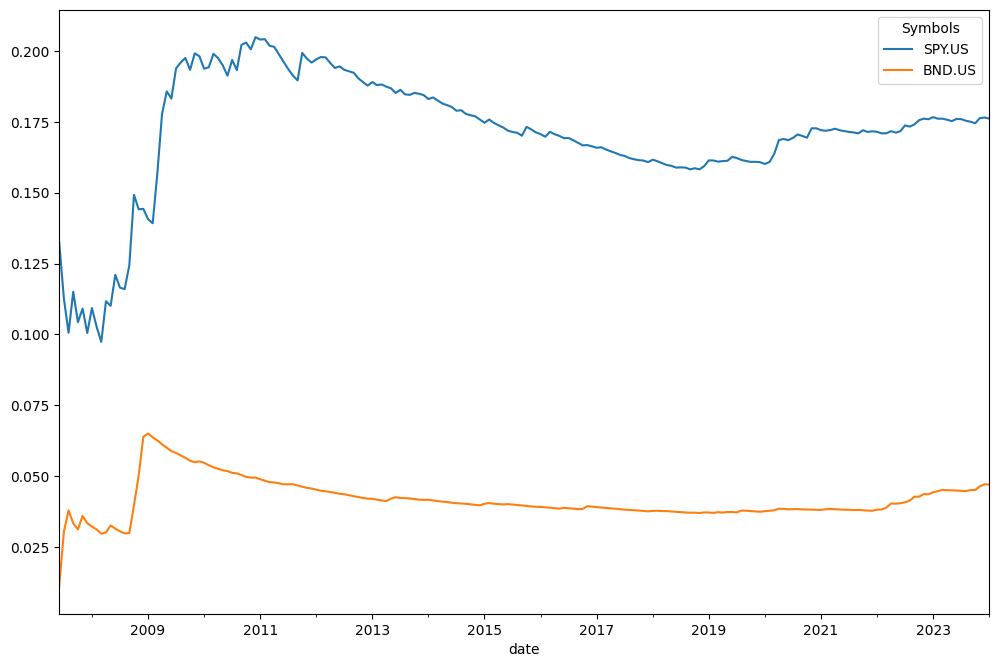

In [9]:
al.risk_annual.plot()

<Axes: xlabel='date'>

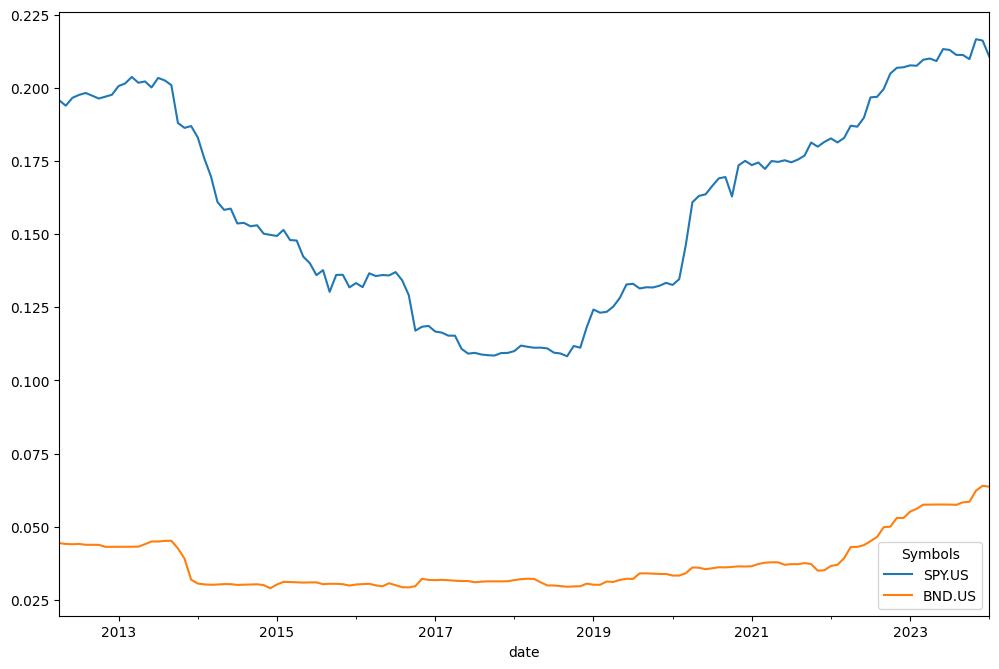

In [10]:
al.get_rolling_risk_annual(window=12 * 5).plot()

In [14]:
al.describe()

C:\Users\Sergey\PycharmProjects\okama\okama\asset.py:175: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  return div.resample("M").sum()
C:\Users\Sergey\PycharmProjects\okama\okama\asset.py:175: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  return div.resample("M").sum()


property              period   SPY.US   BND.US inflation
0          Compound return                 YTD  0.01590 -0.00160   0.00540
1                     CAGR             1 years  0.20603  0.02105   0.03089
2                     CAGR             5 years  0.14194  0.00782   0.04148
3                     CAGR            10 years  0.12509  0.01565   0.02805
4                     CAGR  16 years, 9 months  0.09404  0.02918   0.02419
5   Annualized mean return  16 years, 9 months  0.10801  0.03024       NaN
6           Dividend yield                 LTM  0.01374  0.03090       NaN
7                     Risk  16 years, 9 months  0.17617  0.04695       NaN
8                     CVAR  16 years, 9 months  0.40832  0.15194       NaN
9            Max drawdowns  16 years, 9 months -0.50780 -0.17534       NaN
10     Max drawdowns dates  16 years, 9 months  2009-02  2022-10       NaN
11          Inception date                None  1993-02  2007-05   2007-05
12         Last asset date                None  2024-02  2024-02   2024-01
13   Common last data date                None  2024-01  2024-01   2024-01

## Dividends

In [5]:
al = ok.AssetList(["SBERP.MOEX", "LKOH.MOEX"], ccy="RUB")
al

assets           [SBERP.MOEX, LKOH.MOEX]
currency                             RUB
first_date                       2006-09
last_date                        2023-12
period_length         17 years, 4 months
inflation                       RUB.INFL
dtype: object

In [6]:
al.dividends_annual

SBERP.MOEX   LKOH.MOEX
2006     0.00000     0.00000
2007     0.46500    38.00000
2008     0.65000    42.00000
2009     0.63000    50.00000
2010     0.45000    52.00000
2011     1.15000    59.00000
2012     2.59000   115.00000
2013     3.20000   100.00000
2014     3.20000   120.00000
2015     0.45000   159.00000
2016     1.97000   187.00000
2017     6.00000   205.00000
2018    12.00000   225.00000
2019    16.00000   347.00000
2020    18.70000   396.00000
2021    18.70000   553.00000
2022     0.00000   793.00000
2023    25.00000 1,290.56000

In [8]:
al.dividend_yield

SBERP.MOEX  LKOH.MOEX
2006-09     0.00000    0.00000
2006-10     0.00000    0.00000
2006-11     0.00000    0.00000
2006-12     0.00000    0.00000
2007-01     0.00000    0.00000
...             ...        ...
2023-08     0.09425    0.22437
2023-09     0.09580    0.22950
2023-10     0.09320    0.21406
2023-11     0.09058    0.21095
2023-12     0.09173    0.19069

[208 rows x 2 columns]

In [9]:
al.dividend_yield_annual

SBERP.MOEX  LKOH.MOEX
2006     0.00000    0.00000
2007     0.00667    0.01834
2008     0.07174    0.04368
2009     0.00913    0.02952
2010     0.00599    0.02985
2011     0.01943    0.03469
2012     0.03848    0.05749
2013     0.03999    0.04902
2014     0.08488    0.05393
2015     0.00588    0.06778
2016     0.01518    0.05422
2017     0.03175    0.06148
2018     0.07221    0.04503
2019     0.07008    0.05625
2020     0.07768    0.07663
2021     0.06723    0.08417
2022     0.00000    0.19472
2023     0.09173    0.19069

In [11]:
al.dividend_yield.resample(rule="Y").last()

SBERP.MOEX  LKOH.MOEX
2006     0.00000    0.00000
2007     0.00667    0.01834
2008     0.07174    0.04368
2009     0.00913    0.02952
2010     0.00599    0.02985
2011     0.01943    0.03469
2012     0.03848    0.05749
2013     0.03999    0.04902
2014     0.08488    0.05393
2015     0.00588    0.06778
2016     0.01518    0.05422
2017     0.03175    0.06148
2018     0.07221    0.04503
2019     0.07008    0.05625
2020     0.07768    0.07663
2021     0.06723    0.08417
2022     0.00000    0.19472
2023     0.09173    0.19069

<Axes: >

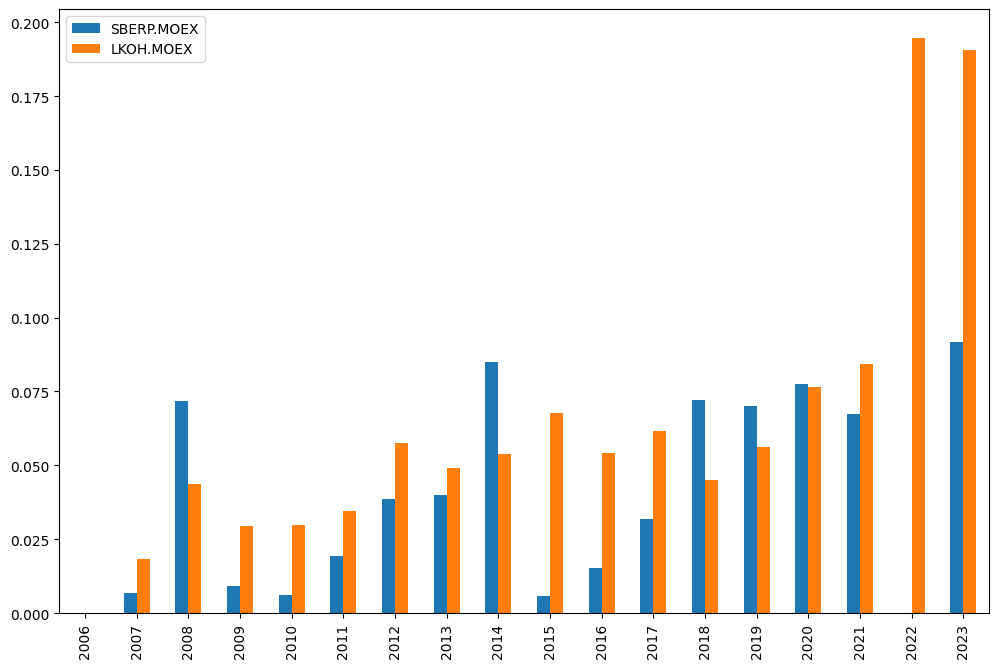

In [12]:
al.dividend_yield_annual.plot(kind="bar")

In [13]:
al.get_dividend_mean_growth_rate()

SBERP.MOEX   -1.00000
LKOH.MOEX     0.28652
dtype: float64

In [14]:
al.get_dividend_mean_yield(10)

SBERP.MOEX   0.05166
LKOH.MOEX    0.08849
dtype: float64

## Plot Wealth

In [15]:
def plot_wealth(
    al: object,
    first_date: str,
    last_date: str,
    legend: list,
    title: str = None,
    logy: bool = False,
    figsize: list = [12, 10],
):
    fig, ax = plt.subplots(figsize=figsize)
    # fig.subplots_adjust(bottom=0.2, top=1.5)
    first_date_dt = pd.to_datetime(first_date)
    last_date_dt = pd.to_datetime(last_date)

    wealth = al.wealth_indexes
    wealth = wealth.loc[first_date:last_date, :]
    index = wealth.index.to_timestamp()
    min_value = wealth.to_numpy().min()
    for i, asset in enumerate(wealth):
        if i == len(wealth.columns) - 1:
            # Inflation is in the last column
            continue
        ax.plot(index, wealth[asset], linewidth=2)
    ax.fill_between(index, min_value, wealth.iloc[:, -1], facecolor="grey", alpha=0.2, label="Инфляция")

    # Log scale
    y_scale = "log" if logy else "linear"
    ax.set_yscale(y_scale)

    # границы графика
    ax.set_xlim(first_date_dt, last_date_dt + pd.DateOffset(months=0))
    ax.set_ylim(bottom=min_value)

    # регулирования надписей оси Х
    years = mdates.YearLocator()  # ежегодный формат
    years_fmt = mdates.DateFormatter("%Y")
    # назначение формата надписей
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    ax.legend(legend + ["Инфляция"], loc="upper left")
    ax.set_title(title)

    # ax.set_ylabel('Инфляция за 12 месяцев, %')

In [16]:
stocks = ok.AssetList(["MCFTR.INDX", "SP500TR.INDX"], ccy="RUB", inflation=False)
stocks

assets           [MCFTR.INDX, SP500TR.INDX]
currency                                RUB
first_date                          1997-10
last_date                           2024-02
period_length            26 years, 5 months
inflation                              None
dtype: object

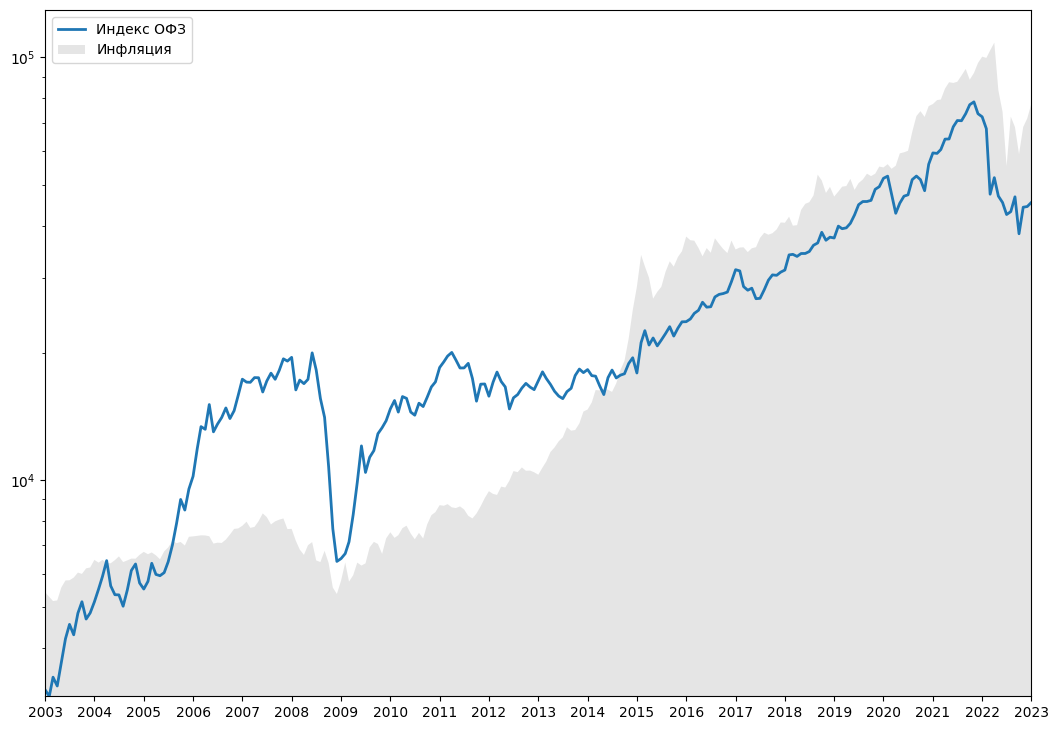

In [17]:
plot_wealth(
    al=stocks, first_date="2003-01", figsize=(14 / 1.1, 10 / 1.1), last_date="2023-01", legend=["Индекс ОФЗ"], logy=True
)